In [21]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
X =  6* np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

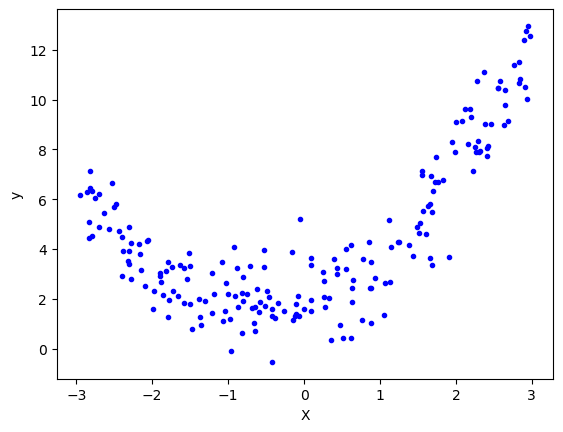

In [19]:
plt.plot(X,y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4042409049534176

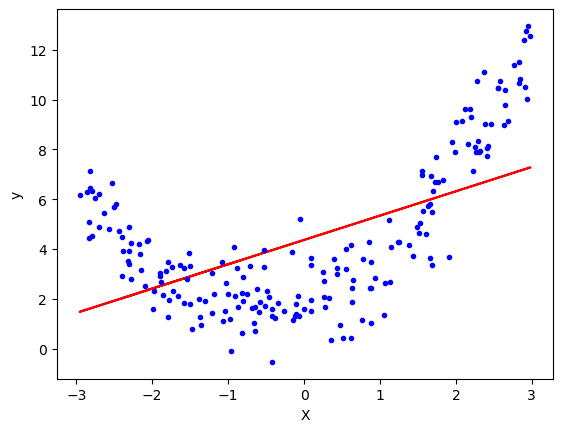

In [33]:
plt.plot(X_train, lr.predict(X_train), color= 'r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [82]:
poly = PolynomialFeatures(degree=3, include_bias = True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [83]:
print(X_train[0])
print(X_train_trans[0])

[-0.81952822]
[ 1.         -0.81952822  0.6716265  -0.55041686]


In [84]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [85]:
y_pred = lr.predict(X_test_trans)

In [86]:
r2_score(y_test, y_pred)

0.859894727366738

In [87]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86033157 0.82315318 0.01230354]]
[1.89948875]


In [88]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

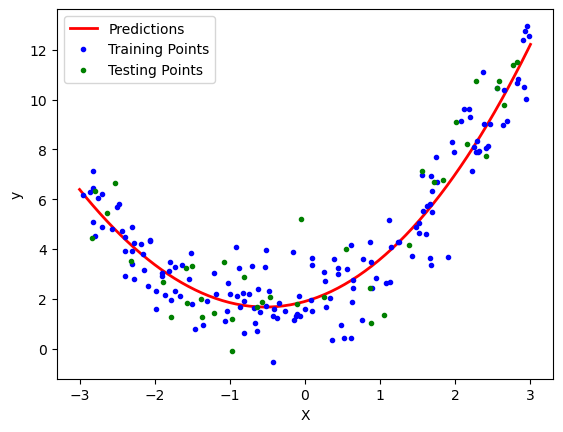

In [89]:
plt.plot(X_new, y_new, 'r-', label='Predictions', linewidth = 2)
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3D

In [94]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7* np.random.rand(100,1) - 2.8

z = x **2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2+np.random.randn(100,1)

In [95]:
import plotly.express as px

In [96]:
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.show()

In [98]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [124]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

fig.show()

In [125]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [144]:
poly = PolynomialFeatures(degree=10, include_bias=True)
X_multi_trans = poly.fit_transform(X_multi)

In [145]:

print("output", poly.n_output_features_)
print("powers", poly.powers_)

output 66
powers [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]]


In [146]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [147]:
X_test_multi = poly.transform(final)

In [148]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [151]:
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
fig.show()